In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
import matplotlib
import matplotlib.pyplot as plt

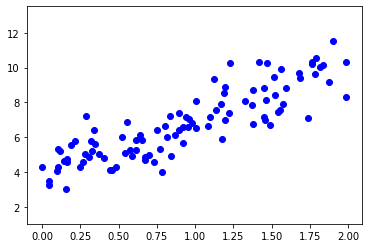

In [3]:
%matplotlib inline
plt.scatter(X, y, color='b')
plt.axis([min(X) - 0.1, max(X) + 0.1, min(y) - 2, max(y) + 2])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('theta_0 =', float(theta_best[0]), 'theta_1 =', float(theta_best[1]))

theta_0 = 3.885998821754149 theta_1 = 3.0872166713566274


In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print('Predictions')
print('x = 0, y =', float(y_predict[0]), 'x = 2, y =', float(y_predict[1]))

Predictions
x = 0, y = 3.885998821754149 x = 2, y = 10.060432164467404


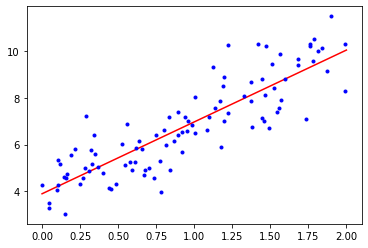

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
#plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('theta_0 =', float(lin_reg.intercept_), 'theta_1 =', float(lin_reg.coef_))
pred = lin_reg.predict(X_new)
print('x = 0, y =', float(pred[0]), 'x = 2, y =', float(pred[1]))

theta_0 = 3.8859988217541517 theta_1 = 3.0872166713566296
x = 0, y = 3.8859988217541517 x = 2, y = 10.06043216446741


In [8]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialisation

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.88599882],
       [3.08721667]])

In [9]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [10]:
theta

array([[3.94288882],
       [3.12566644]])

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.79317038]), array([3.00473642]))

In [12]:
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

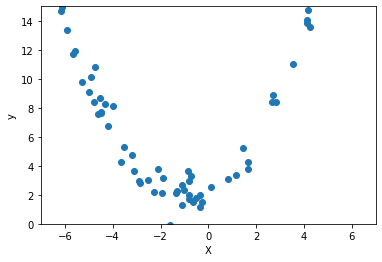

In [13]:
plt.scatter(X, y)
plt.axis([-7, 7, 0, 15])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[90])
print(X_poly[90])

[-6.15911037]
[-6.15911037 37.9346406 ]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.13012957]), array([[0.97978965, 0.49902216]]))

In [16]:
y_pred = lin_reg.predict(X_poly)
y_pred[:2]

array([[21.10120795],
       [ 8.30666122]])

In [17]:
for c0, c1 in lin_reg.coef_:
    b = float(c0)
    a = float(c1)
print(a, b)

0.49902216209969913 0.9797896456049308


In [18]:
def get_poly_graph():
    y_outputs = [] 
    x_inputs = []
    for x in range(-8, 9, 1):
        x_inputs.append(x)
        y_outputs.append(a * x ** 2 + b * x + float(lin_reg.intercept_))
    return x_inputs, y_outputs

In [19]:
xi, yi = get_poly_graph()

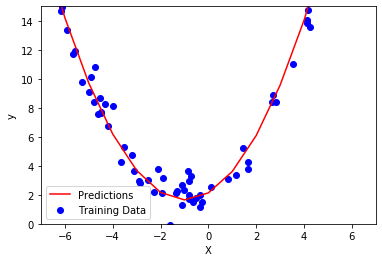

In [20]:
plt.scatter(X, y, color='b', label='Training Data')
plt.plot(xi, yi, color='r', label='Predictions')
plt.axis([-7, 7, 0, 15])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')

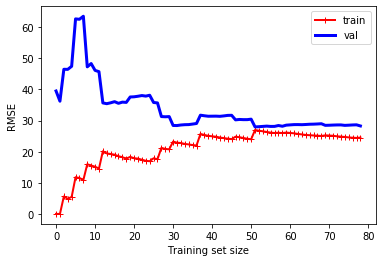

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

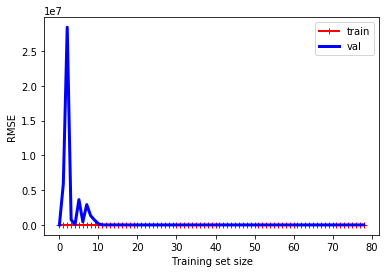

In [23]:
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)), 
                          ('sgd_reg', LinearRegression())))

plot_learning_curves(polynomial_reg, X, y)

# Writing mathematical expressions

https://matplotlib.org/tutorials/text/mathtext.html

math text

`plt.title(r'$\alpha > \beta$')`

## Subscripts and Superscripts

`r'$\alpha_i > \beta_i$'`

`r'$\sum_{i=0}^\infty x_i$'`

## Fractions, Binomials, and Stacked Numbers

`r'$\frac{3}{4} \binom{3}{4} \genfrac{}{}{0}{}{3}{4}$'`

`r'$\left(\frac{5 - \frac{1}{x}}{4}\right)$'`

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
y_sc = scaler.fit_transform(y)

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_pred = ridge_reg.predict([[-11], [-7], [-1.5], [-0.5], [0], [0.5], [1.5], [7], [11]])

In [26]:
print(ridge_pred)

[[40.62629958]
 [32.14177367]
 [20.47555055]
 [18.35441908]
 [17.29385334]
 [16.2332876 ]
 [14.11215613]
 [ 2.44593301]
 [-6.0385929 ]]


In [27]:
sgd_reg = SGDRegressor(penalty='l2', alpha=1)
sgd_reg.fit(X, y.ravel())
sgd_pred = sgd_reg.predict([[-11], [-7], [-1.5], [-0.5], [0], [0.5], [1.5], [7], [11]])

In [28]:
print(sgd_pred)

[23.81941509 20.47372001 15.87338928 15.03696552 14.61875363 14.20054175
 13.36411798  8.76378725  5.41809217]


In [29]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)
lasso_pred = lasso_reg.predict([[-11], [-7], [-1.5], [-0.5], [0], [0.5], [1.5], [7], [11]])
print(lasso_pred)

[40.43072639 32.0440079  20.51226998 18.41559036 17.36725055 16.31891074
 14.22223112  2.6904932  -5.69622528]


In [30]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_pred = elastic_net.predict([[-11], [-7], [-1.5], [-0.5], [0], [0.5], [1.5], [7], [11]])
print(elastic_pred)

[40.59938956 32.12832153 20.48060299 18.36283598 17.30395247 16.24506897
 14.12730196  2.47958342 -5.99148461]


In [31]:
#from sklearn.base import clone
import joblib

sgd_reg = SGDRegressor(warm_start=True, penalty=None,
                       learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train.ravel())
    y_val_pred = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_pred, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        #best_model = clone(sgd_reg)
        joblib.dump(sgd_reg, 'best_model.pkl')

best_model = joblib.load('best_model.pkl')
sgd_early_pred = best_model.predict([[-11], [-7], [-1.5], [-0.5], [0], [0.5], [1.5], [7], [11]])
print(sgd_early_pred)

[ 39.13279868  28.9142723   14.86379853  12.30916693  11.03185114
   9.75453534   7.19990374  -6.85057003 -17.06909641]


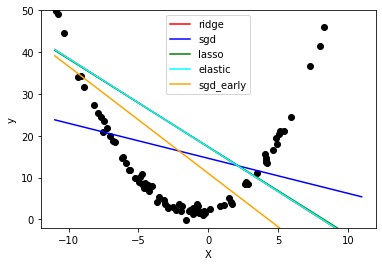

In [32]:
plt.scatter(X, y, color='black')
plt.plot([-11, -7, -1.5, -0.5, 0, 0.5, 1.5, 7, 11], ridge_pred, color='r', label='ridge')
plt.plot([-11, -7, -1.5, -0.5, 0, 0.5, 1.5, 7, 11], sgd_pred, color='b', label='sgd')
plt.plot([-11, -7, -1.5, -0.5, 0, 0.5, 1.5, 7, 11], lasso_pred, color='g', label='lasso')
plt.plot([-11, -7, -1.5, -0.5, 0, 0.5, 1.5, 7, 11], elastic_pred, color='cyan', label='elastic')
plt.plot([-11, -7, -1.5, -0.5, 0, 0.5, 1.5, 7, 11], sgd_early_pred, color='orange', label='sgd_early')
plt.axis([-12, 12, -2, 50])
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [35]:
# import dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, 3].reshape(-1, 1) # petal width column
y = (iris['target'] == 2).astype(np.int) # 1 if Virginica else 0

In [36]:
# train Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

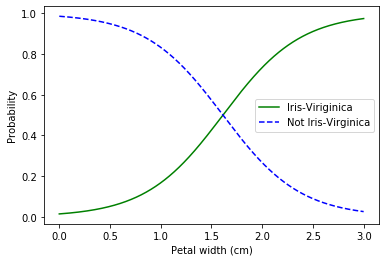

In [39]:
# get estimated probabilities for petal widths 0-3cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Viriginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend()
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.show()

In [43]:
log_reg.predict([[1.5], [1.6], [1.65], [1.7]])

array([0, 0, 1, 1])

In [45]:
X = iris['data'][:, (2, 3)] # petal length and width
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = softmax_reg.predict([[5, 2], [3, 1.5], [2, 2.3]])
y_proba = softmax_reg.predict_proba([[5, 2], [3, 1.5], [2, 2.3]])
print(y_pred)
print(y_proba)

[2 1 0]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]
 [1.33087477e-01 8.66806819e-01 1.05703875e-04]
 [9.43028185e-01 5.69532726e-02 1.85426586e-05]]


# Exercises

1) SGD or Mini-batch GD.

2) Most regularised algorithms such as Ridge, Lasso, Elastic Net. We can use a StandardScaler to scale the data before training the model.

(If the features have very different scales, the cost function will have the shape of an elongated bowl, so GD algorithms will take longer to converge. Note, Normal Equation works fine without scaling).

3) The cost function is convex and has a simple path to the global minimum with no local optima.

4) No, SGD and Mini-batch GD do not settle on the global minimum as does Batch GD.

5) Overfitting. We can use regularisation.

(If validation error goes up, the learning rate could be too high and therefore diverging. If training error also goes up, then we should clearly reduce the learning rate. If training error is not going up, then overfitting and we should stop training)

6) We can let it go for a few runs without improvements just to check of the minimum validation has in fact been reached. Therefore we must save the state of our best model to revert back once we sure we will not beat the record.

7) a) SGD, b) Batch, c) use a learning rate that decreases optimally to get very near the global minimum.

8) There is overfitting. The model could be too complex so we can reduce the degrees of freedom. Also we can use regularisation (l2 penalty/Ridge or l1 penalty/Lasso) if not doing so already. Lastly, we can get more training data.

9) Underfitting therefore high bias, we should reduce alpha so that the weights can increase and therefore model the data better.

10) a) Ridge is regularised while Linear Regression is not, b) Lasso is able to reduce those weights for features that are not important, unlike Ridge, c) Elastic Net is better when several features are strongly correlated or the number of features are greater than the number of instances in the training data.

11) Softmax is not multioutput, so 2 Logits is able to calssify the indoor/outdoor classes and the daytime/nighttime classes seperately.

## 12) Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)

See 04_training_linear_models.ipynb